In [3]:
!ls './Reports_grid/'

age  city  education  gender  it  politics  profession	region	religion


In [59]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

def train_val_metrics(histories):
    print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'), get_avg(histories, 'acc')))
    print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'), get_avg(histories, 'val_acc')))

In [61]:
import matplotlib.pyplot as plt
def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


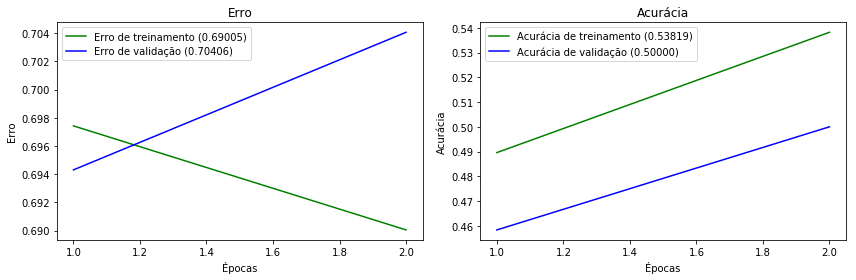

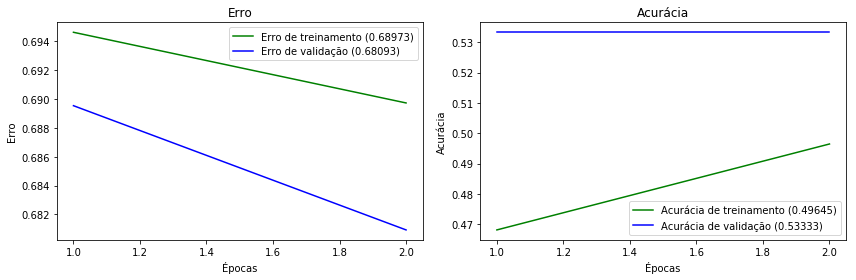

Training: 	0.6914 loss / 0.5247 acc
Validation: 	0.6873 loss / 0.5567 acc


In [62]:
with open('./Reports_grid/it/brmoral_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    train_val_metrics(histories)
    #plot_history(histories[2])

In [63]:
from Models.functions.datasets import loadTrainTest

In [64]:
!ls ./Grid

b5post__grid.csv     brmoral__grid.csv	esic__grid.csv	 smscorpus__grid.csv
brblogset__grid.csv  enblog__grid.csv	pan13__grid.csv


In [78]:
#pan13__grid.csv
import pandas as pd
import ast
def getReports(dataset_name, sort=False, task=None):

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')

    rp = rp.filter(['dataset','task','lang','f1','loss','val_loss','embedding_dim','units','tunning'])
    if task != None:
        rp = rp[(rp['task'] == task)]        
    if sort == True:
        rp = rp.sort_values(['f1'], ascending=False)
    return rp

### PAN AUTHOR PROFILING TASK RESULTS
#### Gender: 0.59 / Age: 0.64

In [79]:
getReports('pan13', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
122,pan13,gender,es,0.647167,0.648858,0.623869,lstm lstm attention
121,pan13,gender,en,0.603737,0.668312,0.656876,lstm lstm attention
4,pan13,gender,en,0.515005,0.694807,0.690842,test channels
11,pan13,gender,en,0.509470,0.691336,0.691297,test channels
17,pan13,gender,en,0.507661,0.694685,0.684922,test channels


In [80]:
getReports('pan13', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
124,pan13,age,es,0.665298,0.766275,0.675997,lstm lstm attention
119,pan13,age,en,0.661634,0.755226,0.720119,lstm alstm attention
123,pan13,age,en,0.656656,0.712718,0.722855,lstm lstm attention
120,pan13,age,en,0.655232,0.753669,0.718869,lstm alstm attention
118,pan13,age,en,0.627492,0.707284,0.724197,lstm alstm attention


### BRMORAL Baseline1 results
#### Gender: 0.628 / Age: 0.404 / Religion: 0.406 / Education: 0.402 / TI: 0.63 / Politics: 0.49

In [81]:
getReports('brmoral', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
97,brmoral,gender,pt,0.719170,NaN,NaN,embedding_dim
104,brmoral,gender,pt,0.713043,NaN,NaN,test2 embeddings
105,brmoral,gender,pt,0.696067,NaN,NaN,test2 embeddings
95,brmoral,gender,pt,0.690044,NaN,NaN,embedding_dim
71,brmoral,gender,pt,0.682585,NaN,NaN,NaN


In [82]:
getReports('brmoral', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
140,brmoral,age,pt,0.412894,0.891877,1.065156,lstm alstm attention
102,brmoral,age,pt,0.412616,NaN,NaN,embedding_dim
138,brmoral,age,pt,0.411758,1.055046,1.085149,lstm alstm attention
101,brmoral,age,pt,0.407934,NaN,NaN,embedding_dim
100,brmoral,age,pt,0.405822,NaN,NaN,embedding_dim


In [83]:
getReports('brmoral', sort=True, task='religion')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
112,brmoral,religion,pt,0.375490,NaN,NaN,test2 embeddings
113,brmoral,religion,pt,0.348166,NaN,NaN,create_cnn
110,brmoral,religion,pt,0.345938,NaN,NaN,test2 embeddings
111,brmoral,religion,pt,0.342576,NaN,NaN,test2 embeddings
109,brmoral,religion,pt,0.340353,NaN,NaN,test2 embeddings


In [30]:
getReports('brmoral', sort=True, task='it')[:5]

,dataset,task,lang,f1,loss,val_loss
118,brmoral,it,pt,0.673774,NaN,NaN
119,brmoral,it,pt,0.642855,NaN,NaN
123,brmoral,it,pt,0.638848,NaN,NaN
120,brmoral,it,pt,0.632790,NaN,NaN
117,brmoral,it,pt,0.618266,NaN,NaN


In [85]:
getReports('brmoral', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
3,brmoral,education,pt,0.344252,NaN,NaN,NaN
149,brmoral,education,pt,0.278970,1.099461,1.099225,lstm lstm attention
155,brmoral,education,pt,0.268758,1.100799,1.100378,lstm lstm attention
9,brmoral,education,pt,0.262219,NaN,NaN,NaN
161,brmoral,education,pt,0.244438,1.098965,1.097172,lstm lstm attention


In [32]:
getReports('brmoral', sort=True, task='politics')[:5]

,dataset,task,lang,f1,loss,val_loss
5,brmoral,politics,pt,0.301516,NaN,NaN
11,brmoral,politics,pt,0.287269,NaN,NaN
157,brmoral,politics,pt,0.177496,1.101205,1.095197
163,brmoral,politics,pt,0.176967,1.098133,1.097093
151,brmoral,politics,pt,0.172557,1.096063,1.096601


### enblogs RESULTS
#### gender: 0.75 / age: 0.72

In [33]:
getReports('enblog', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss
45,enblog,gender,en,0.721580,0.588780,0.552338
40,enblog,gender,en,0.720872,0.687490,0.584803
47,enblog,gender,en,0.719113,0.702937,0.596921
39,enblog,gender,en,0.715373,0.567603,0.595078
64,enblog,gender,en,0.715212,0.592798,0.636496


In [34]:
getReports('enblog', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss
78,enblog,age,en,0.728454,0.634157,0.718872
74,enblog,age,en,0.723733,0.680849,0.908708
77,enblog,age,en,0.714268,0.739922,0.738682
79,enblog,age,en,0.705655,0.781800,0.830243
76,enblog,age,en,0.694118,0.809988,0.888682


### e-Sic RESULTS

In [70]:
getReports('esic', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss
25,esic,gender,pt,0.717731,0.541128,0.526335
31,esic,gender,pt,0.714097,0.582249,0.526964
19,esic,gender,pt,0.706578,0.529025,0.545368
13,esic,gender,pt,0.705531,0.459331,0.530403
7,esic,gender,pt,0.690879,0.601624,0.543652


In [71]:
getReports('esic', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss
26,esic,age,pt,0.521225,0.979617,0.942168
32,esic,age,pt,0.517950,0.976276,0.951192
14,esic,age,pt,0.513820,0.985327,0.963113
20,esic,age,pt,0.512747,0.988539,0.963288
8,esic,age,pt,0.484739,0.986434,0.957761


In [39]:
getReports('esic', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss
27,esic,education,pt,0.514605,0.999362,0.971624
33,esic,education,pt,0.513464,0.999000,0.969199
21,esic,education,pt,0.509671,1.006895,0.978940
15,esic,education,pt,0.507144,1.006306,0.991703
3,esic,education,pt,0.471145,1.005899,0.980008


In [40]:
getReports('esic', sort=True, task='region')[:5]

,dataset,task,lang,f1,loss,val_loss
35,esic,region,pt,0.372573,1.250581,1.340244
29,esic,region,pt,0.370528,1.310441,1.341008
23,esic,region,pt,0.362629,1.370322,1.373430
17,esic,region,pt,0.355703,1.369051,1.364799
11,esic,region,pt,0.348537,1.364214,1.370889


In [41]:
getReports('esic', sort=True, task='city')[:5]

,dataset,task,lang,f1,loss,val_loss
36,esic,city,pt,0.638797,0.648742,0.632171
30,esic,city,pt,0.635964,0.648913,0.632109
24,esic,city,pt,0.627789,0.653439,0.645156
18,esic,city,pt,0.626339,0.654591,0.631565
6,esic,city,pt,0.600306,0.654440,0.636970


## SMS

In [42]:
getReports('smscorpus', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss
184,smscorpus,gender,en,0.696357,0.519075,0.558395
89,smscorpus,gender,en,0.655474,0.630732,0.647252
53,smscorpus,gender,en,0.652193,0.634811,0.665229
77,smscorpus,gender,en,0.651242,0.612268,0.646604
129,smscorpus,gender,en,0.649970,0.635985,0.643665


In [43]:
getReports('smscorpus', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss
185,smscorpus,age,en,0.649665,0.689024,0.814723
5,smscorpus,age,en,0.524103,0.978348,0.876987
18,smscorpus,age,en,0.488862,0.986791,0.951409
13,smscorpus,age,en,0.477225,0.910854,0.964932
6,smscorpus,age,en,0.447809,0.881178,1.016459


In [46]:
!ls Reports_Grid

ls: cannot access 'Reports_Grid': No such file or directory


In [57]:
getReports('b5post', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss
12,b5post,gender,pt,0.568805,0.688568,0.680612
4,b5post,gender,pt,0.566941,0.690113,0.691133
8,b5post,gender,pt,0.557336,0.689682,0.686989
0,b5post,gender,pt,0.484858,0.691054,0.685440


In [58]:
getReports('b5post', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss
5,b5post,age,pt,0.367570,1.094447,1.095980
1,b5post,age,pt,0.359525,1.099084,1.083484
9,b5post,age,pt,0.302955,1.099820,1.094736


### BrBlogSet

In [67]:
getReports('brblogset', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss
17,brblogset,gender,pt,0.732704,0.491263,0.547085
18,brblogset,gender,pt,0.726109,0.608671,0.657071
0,brblogset,gender,pt,0.725634,0.445453,0.521285
15,brblogset,gender,pt,0.708887,0.516152,0.606929
13,brblogset,gender,pt,0.701398,0.422187,0.586465


In [75]:
getReports('brmoral', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
140,brmoral,age,pt,0.412894,0.891877,1.065156,lstm alstm attention
102,brmoral,age,pt,0.412616,NaN,NaN,embedding_dim
138,brmoral,age,pt,0.411758,1.055046,1.085149,lstm alstm attention
101,brmoral,age,pt,0.407934,NaN,NaN,embedding_dim
100,brmoral,age,pt,0.405822,NaN,NaN,embedding_dim


In [74]:
getReports('brmoral', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
3,brmoral,education,pt,0.344252,NaN,NaN,NaN
149,brmoral,education,pt,0.278970,1.099461,1.099225,lstm lstm attention
155,brmoral,education,pt,0.268758,1.100799,1.100378,lstm lstm attention
9,brmoral,education,pt,0.262219,NaN,NaN,NaN
161,brmoral,education,pt,0.244438,1.098965,1.097172,lstm lstm attention
